In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [81]:
df = pd.read_csv('restaurante_correto.csv')
df

,alternativo,Bar,SexSab,fome,Cliente,Preco,Chuva,Res,Tipo,Tempo,Conclusao
0,Sim,Nao,Nao,Sim,Alguns,RRR,Nao,Sim,Frances,0-10,Sim
1,Sim,Nao,Nao,Sim,Cheio,R,Nao,Nao,Tailandes,30-60,Nao
2,Nao,Sim,Nao,Nao,Alguns,R,Nao,Nao,Hamburger,0-10,Sim
3,Sim,Nao,Sim,Sim,Cheio,R,Sim,Nao,Tailandes,10-30,Sim
4,Sim,Nao,Sim,Nao,Cheio,RRR,Nao,Sim,Frances,>60,Nao
5,Nao,Sim,Nao,Sim,Alguns,RR,Sim,Sim,Italiano,0-10,Sim
6,Nao,Sim,Nao,Nao,Nenhum,R,Sim,Nao,Hamburger,0-10,Nao
7,Nao,Nao,Nao,Sim,Alguns,RR,Sim,Sim,Tailandes,0-10,Sim
8,Nao,Sim,Sim,Nao,Cheio,R,Sim,Nao,Hamburger,>60,Nao
9,Sim,Sim,Sim,Sim,Cheio,RRR,Nao,Sim,Italiano,10-30,Nao


In [82]:
le = LabelEncoder()
df['alternativo_n']=le.fit_transform(df['alternativo'])
df['Bar_n']=le.fit_transform(df['Bar'])
df['SexSab_n']=le.fit_transform(df['SexSab'])
df['fome_n']=le.fit_transform(df['fome'])
df['Cliente_n']=le.fit_transform(df['Cliente'])
df['Preco_n']=le.fit_transform(df['Preco'])
df['Chuva_n']=le.fit_transform(df['Chuva'])
df['Res_n']=le.fit_transform(df['Res'])
df['Tipo_n']=le.fit_transform(df['Tipo'])
df['Tempo_n']=le.fit_transform(df['Tempo'])
df['Conclusao_n']=le.fit_transform(df['Conclusao'])
df

,alternativo,Bar,SexSab,fome,Cliente,Preco,Chuva,Res,Tipo,Tempo,...,Bar_n,SexSab_n,fome_n,Cliente_n,Preco_n,Chuva_n,Res_n,Tipo_n,Tempo_n,Conclusao_n
0,Sim,Nao,Nao,Sim,Alguns,RRR,Nao,Sim,Frances,0-10,...,0,0,1,0,2,0,1,0,0,1
1,Sim,Nao,Nao,Sim,Cheio,R,Nao,Nao,Tailandes,30-60,...,0,0,1,1,0,0,0,3,2,0
2,Nao,Sim,Nao,Nao,Alguns,R,Nao,Nao,Hamburger,0-10,...,1,0,0,0,0,0,0,1,0,1
3,Sim,Nao,Sim,Sim,Cheio,R,Sim,Nao,Tailandes,10-30,...,0,1,1,1,0,1,0,3,1,1
4,Sim,Nao,Sim,Nao,Cheio,RRR,Nao,Sim,Frances,>60,...,0,1,0,1,2,0,1,0,3,0
5,Nao,Sim,Nao,Sim,Alguns,RR,Sim,Sim,Italiano,0-10,...,1,0,1,0,1,1,1,2,0,1
6,Nao,Sim,Nao,Nao,Nenhum,R,Sim,Nao,Hamburger,0-10,...,1,0,0,2,0,1,0,1,0,0
7,Nao,Nao,Nao,Sim,Alguns,RR,Sim,Sim,Tailandes,0-10,...,0,0,1,0,1,1,1,3,0,1
8,Nao,Sim,Sim,Nao,Cheio,R,Sim,Nao,Hamburger,>60,...,1,1,0,1,0,1,0,1,3,0
9,Sim,Sim,Sim,Sim,Cheio,RRR,Nao,Sim,Italiano,10-30,...,1,1,1,1,2,0,1,2,1,0


In [83]:
df = df.drop(['alternativo','Bar','SexSab','fome','Cliente','Preco','Chuva','Res','Tipo','Tempo','Conclusao'],axis='columns')
df

,alternativo_n,Bar_n,SexSab_n,fome_n,Cliente_n,Preco_n,Chuva_n,Res_n,Tipo_n,Tempo_n,Conclusao_n
0,1,0,0,1,0,2,0,1,0,0,1
1,1,0,0,1,1,0,0,0,3,2,0
2,0,1,0,0,0,0,0,0,1,0,1
3,1,0,1,1,1,0,1,0,3,1,1
4,1,0,1,0,1,2,0,1,0,3,0
5,0,1,0,1,0,1,1,1,2,0,1
6,0,1,0,0,2,0,1,0,1,0,0
7,0,0,0,1,0,1,1,1,3,0,1
8,0,1,1,0,1,0,1,0,1,3,0
9,1,1,1,1,1,2,0,1,2,1,0


In [84]:
independent_variable = df.drop('Conclusao_n',axis='columns')
dependent_var=df['Conclusao_n']

In [85]:
model = tree.DecisionTreeClassifier(criterion='entropy')
#The line model = model = tree.DecisionTreeClassifier() is used to create an instance of a decision tree classifier model in scikit-learn.

In [86]:
model.fit(independent_variable,dependent_var)
#The fit method in machine learning is used to train a model on a given dataset

DecisionTreeClassifier(criterion='entropy')

In [87]:
model.score(independent_variable, dependent_var)

1.0

In [88]:
#model.predict([[1,0,1,1,1,0,1,0,3,1]])


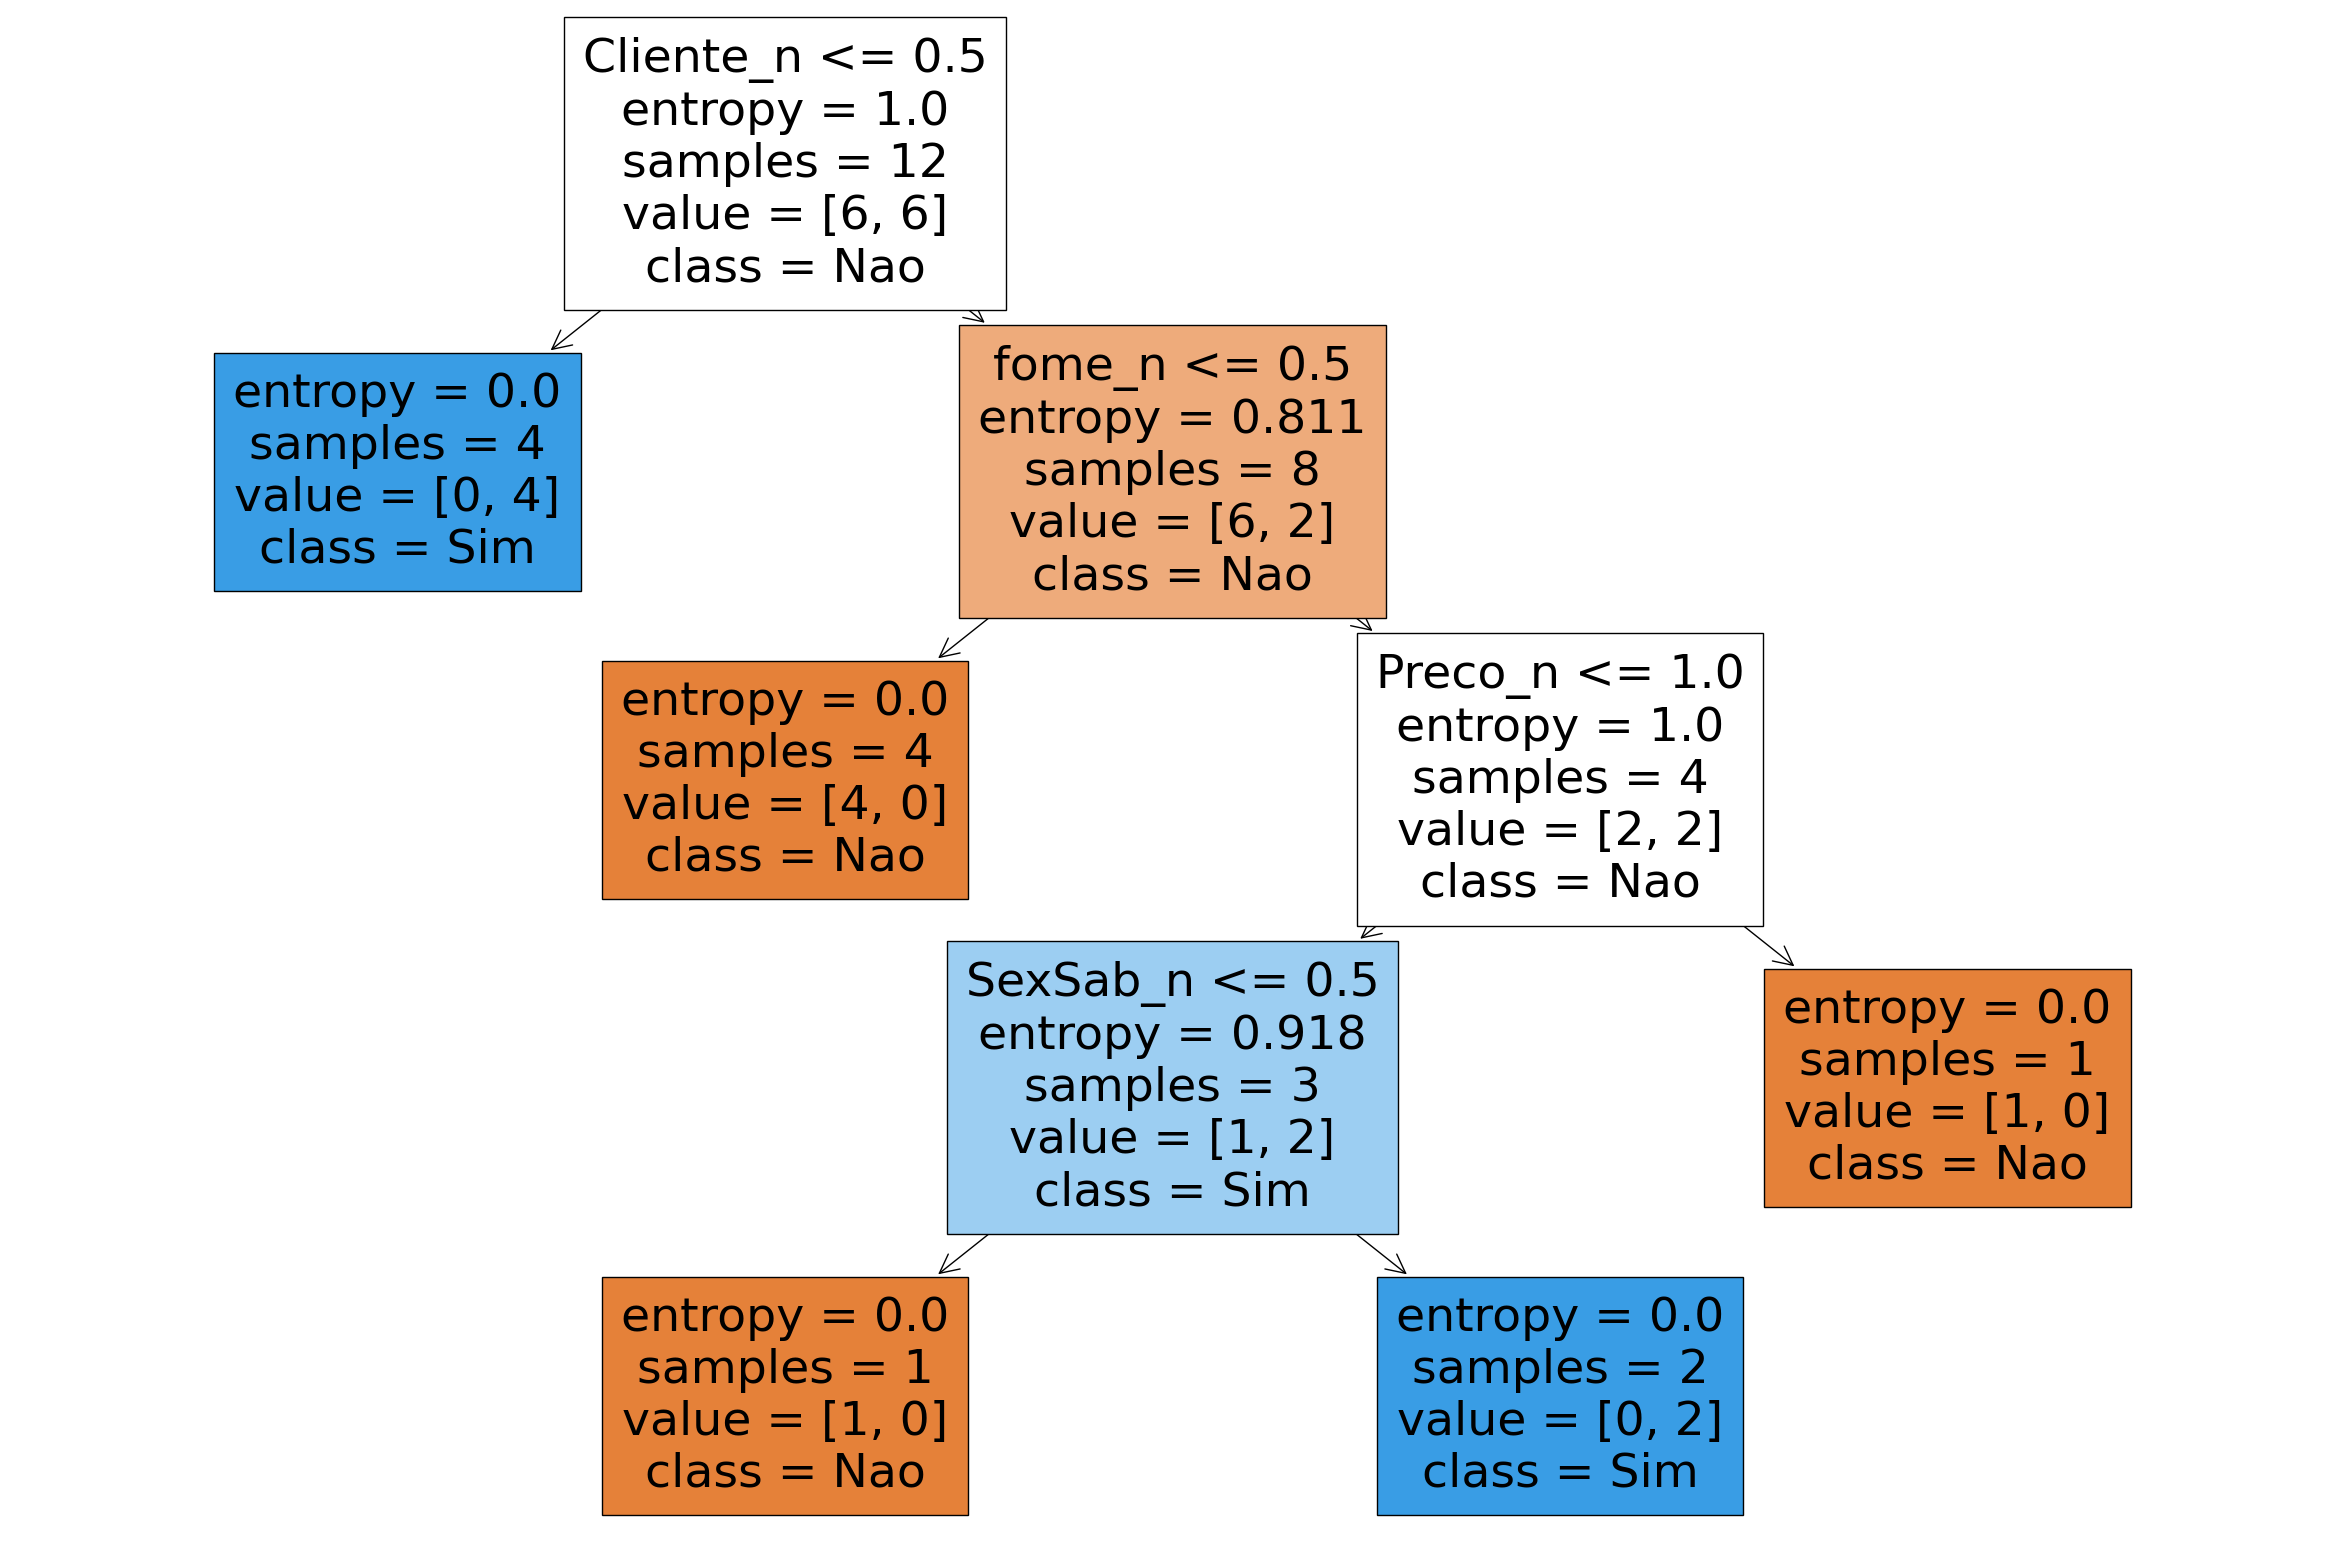

In [91]:
plt.figure(figsize=(30,20))
plot_tree(model, filled = True, feature_names = df.columns, class_names = le.classes_)
#model: This parameter should be a trained decision model
#filled=True: This parameter is an optional argument that specifies whether to fill the tree models nodes with colors or not. When set to True
#feature_names=df.columns: This parameter specifies the names of the features(columns) in your dataset.

plt.show()